# Example of Timing: Peak Time

In [4]:
import math
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Noise function

In [5]:
def noise(s):
    rand = random.uniform(0.001,0.999)
    return s * math.log((1 - rand)/rand)

### Time to pulses 

In [6]:
def time_to_pulses(time, t_0 = 0.011, a = 1.1, b = 0.015, add_noise = True):
    
    pulses = 0
    pulse_duration = t_0
    
    while time >= pulse_duration:
        time = time - pulse_duration
        pulses = pulses + 1
        pulse_duration = a * pulse_duration + add_noise * noise(b * a * pulse_duration)
        
    return pulses

In [7]:
intervals = [0, 0.011, 0.025, 0.1, 0.5, 1, 10]
print("t (s)", "\t", "pulses")
for t in intervals:
    print(t, "\t", time_to_pulses(t))

t (s) 	 pulses
0 	 0
0.011 	 1
0.025 	 2
0.1 	 6
0.5 	 16
1 	 23
10 	 46


### Pulses to time

In [8]:
def pulses_to_time(pulses, t_0 = 0.011, a = 1.1, b = 0.015, add_noise = True):
    
    time = 0
    pulse_duration = t_0
    
    while pulses > 0:
        time = time + pulse_duration
        pulses = pulses - 1
        pulse_duration = a * pulse_duration + add_noise * noise(b * a * pulse_duration)
    
    return time

In [9]:
pulses_to_time(25)

1.00168537680585

### Peak time example

In [10]:
def peak(t, reps = 10, n_training = 10, n_trials = 100):
    results = pd.DataFrame(columns = ['rep', 'val'])
    for rep in range(reps):
        goal_pulses = 0
        for i in range(n_training):
            goal_pulses += time_to_pulses(t)
        goal_pulses = goal_pulses / n_training
        for i in range(n_trials):
            val = pulses_to_time(goal_pulses)
            results.loc[len(results)] = [rep, val]
    return results['val']

In [11]:
res18 = peak(18)
res12 = peak(12)
res6 = peak(6)

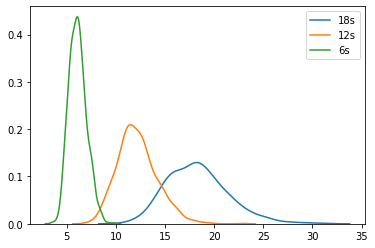

In [12]:
sns.kdeplot(np.array(res18), label="18s")
sns.kdeplot(np.array(res12), label="12s")
sns.kdeplot(np.array(res6), label="6s")

## Assignment: Bisection

Write a function that generates a bisection plot given a range of values to be tested, number of simulated subjects, number of training trials for long and short, and number of test trial per subject.

`def bisection(values, reps = 100, n_training = 10, n_trials = 10):`

You should be able to call the function with:

`values_3to6 = [3, 3.37, 3.78, 4.24, 4.76, 5.34, 6]`

`bisection(values_3to6)`

which should then produce something like:



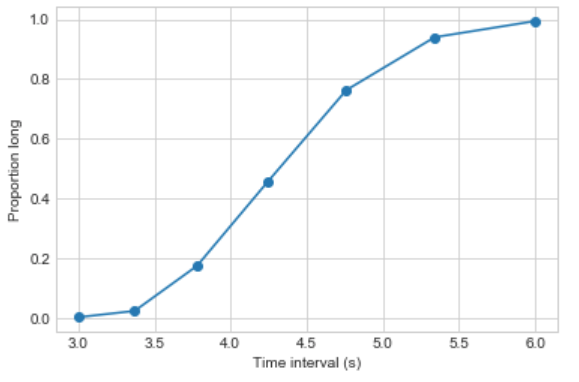

Other value ranges you can try are:

`values_4to12 = [4, 4.8, 5.77, 6.93, 8.32, 9.99, 12]`

`values_2to8 = [2, 2.52, 3.18, 4, 5.04, 6.35, 8]`

In [13]:
def bisection(values, reps = 100, n_training = 10, n_trials = 10):   
    
    average_longs = [0 for x in values]
    #For each subject
    for rep in range(reps):
            short_pulses = 0
            long_pulses = 0
            #Train them on the pulses of long and short durations first.
            for i in range(n_training):
                short_pulses += time_to_pulses(values[0])
                long_pulses += time_to_pulses(values[-1])
                
            short_pulses = short_pulses / n_training
            long_pulses = long_pulses / n_training
            
            #For each value, tell them to estimate if it is closer to long or short.
            proportion_longs = []
            for t in values:
                # If the interval is closer to short, then it says 0, if its closer to long, it says 1.
                count_longs = 0
                for i in range(n_trials):
                    val = time_to_pulses(t)
                    
                    #Absolute distance between the current time and the two intervals.
                    distance_to_short = abs(short_pulses - val)
                    distance_to_long = abs(long_pulses - val)
                    if distance_to_short <= distance_to_long:
                        continue
                    else:
                        count_longs += 1
                
                #Percentage of longs in the trials.
                long_percentage = count_longs/n_trials
                proportion_longs.append(long_percentage)
            for i in range(len(average_longs)):
                average_longs[i] += proportion_longs[i]
    average_longs = [x/reps for x in average_longs]
    return average_longs
    

In [14]:
values_3to6 = [3, 3.37, 3.78, 4.24, 4.76, 5.34, 6]

In [15]:
proportion_longs = bisection(values_3to6)

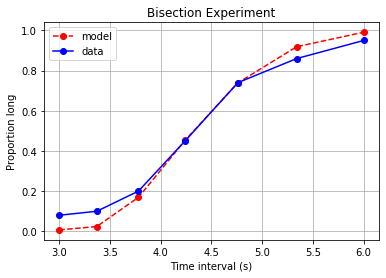

In [16]:
plt.grid()
plt.xlabel("Time interval (s)")
plt.ylabel("Proportion long")
plt.title("Bisection Experiment")
plt.plot(values_3to6,proportion_longs,linestyle='--', marker='o', color='r',label="model")
actual_longs = [0.08,0.1,0.2,0.45,0.74,0.86,0.95]
plt.plot(values_3to6,actual_longs, marker='o', color='b',label="data") 
plt.legend()

In [17]:
values_4to12 = [4, 4.8, 5.77, 6.93, 8.32, 9.99, 12]

In [18]:
proportion_longs = bisection(values_4to12)

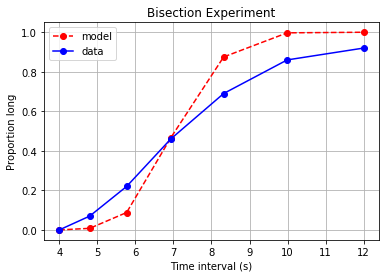

In [19]:
plt.grid()
plt.xlabel("Time interval (s)")
plt.ylabel("Proportion long")
plt.title("Bisection Experiment")
plt.plot(values_4to12,proportion_longs,linestyle='--', marker='o', color='r',label="model")
actual_longs = [0.0,0.07,0.22,0.46,0.69,0.86,0.92]
plt.plot(values_4to12,actual_longs, marker='o', color='b',label="data") 
plt.legend()

In [20]:
values_2to8 = [2, 2.52, 3.18, 4, 5.04, 6.35, 8]

In [21]:
proportion_longs = bisection(values_2to8)

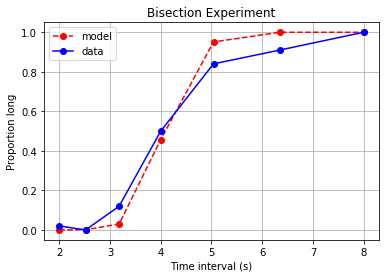

In [22]:
plt.grid()
plt.xlabel("Time interval (s)")
plt.ylabel("Proportion long")
plt.title("Bisection Experiment")
plt.plot(values_2to8,proportion_longs,linestyle='--', marker='o', color='r',label="model")
actual_longs = [0.02,0.0,0.12,0.5,0.84,0.91,1.0]
plt.plot(values_2to8,actual_longs, marker='o', color='b',label="data") 
plt.legend()